# Notebook seasonality prediction

In [1]:
import main as tools

from sklearn.linear_model import LinearRegression
from sklearn

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
sns.set_style("darkgrid")

# Load everythign into a dictionary
data_dict = tools.load_data_dict()

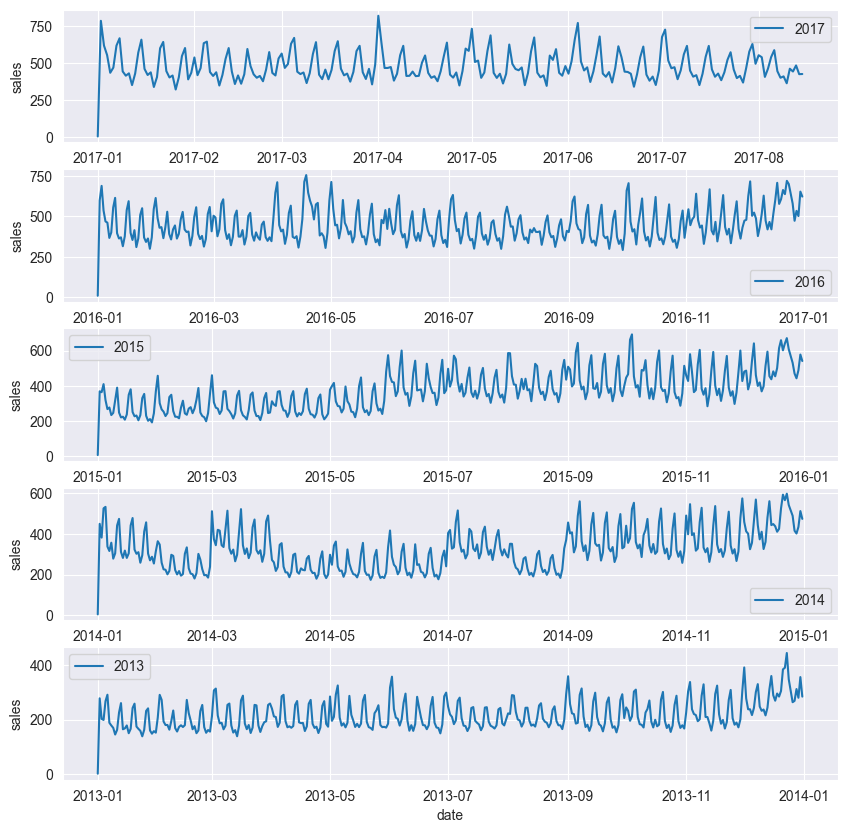

In [3]:
# plotting original data
avg = data_dict['avg']
x= avg['sales']


fig, ax = plt.subplots(5,1, figsize=(10,10))
## lets look at each year
for year in range(2013, 2018):
    year_data = data_dict['avg'][data_dict['avg'].index.year== year]
    x = year_data['sales']
    sns.lineplot(x, label=year, ax=ax[2017-year])

## We see alot of periodicity (is this a word?) in the data

Above is too dense, lets just do one year by year for now

[Text(0.5, 0, 'data'), Text(0, 0.5, 'day before')]

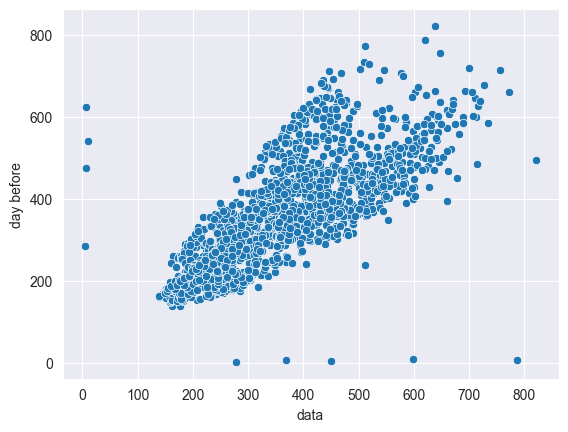

In [16]:
# what if we plot with the day respect to the day before?
data = data_dict['avg']
delayed = data.shift(1)

ax = sns.scatterplot(x=data['sales'], y=delayed['sales'] )
ax.set(xlabel='data', ylabel='day before')

## disregarding the outlier seems like there is some correlation

                   id  time
date                       
2013-01-01      890.5     0
2013-01-02     2672.5     1
2013-01-03     4454.5     2
2013-01-04     6236.5     3
2013-01-05     8018.5     4
...               ...   ...
2017-08-11  2992868.5  1679
2017-08-12  2994650.5  1680
2017-08-13  2996432.5  1681
2017-08-14  2998214.5  1682
2017-08-15  2999996.5  1683

[1684 rows x 2 columns]


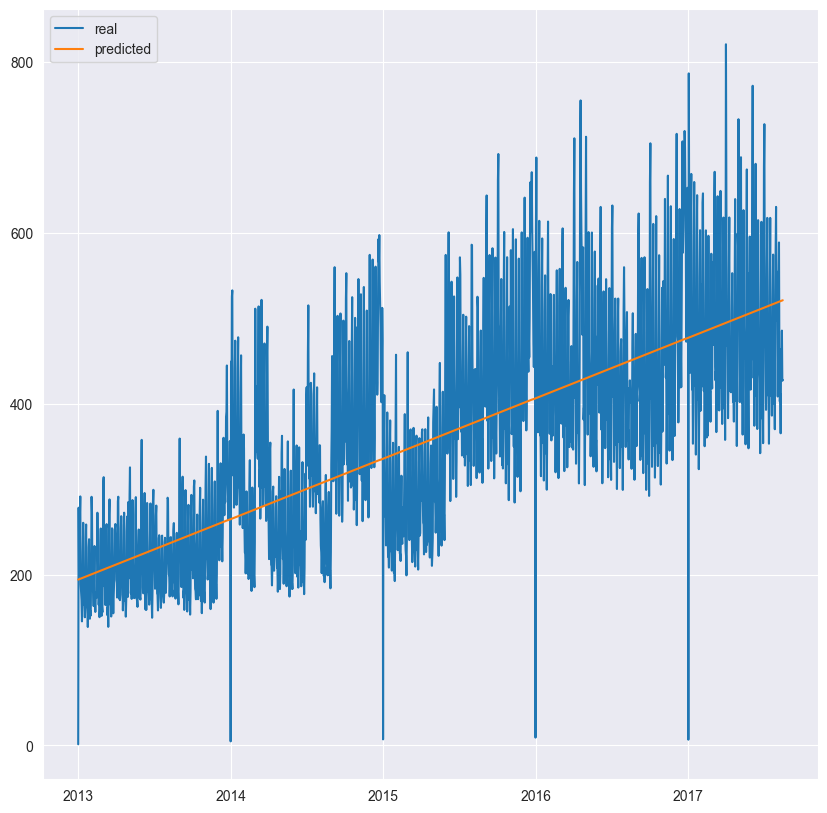

In [18]:
## fitting a linear regression
x = data

time_dummy = np.arange(len(x.index))
x['time'] = time_dummy


x = x.drop(['sales','onpromotion'], axis=1)
try:
    x = x.drop(['sales','onpromotion'], axis=1)
except:
    pass

y = data['sales']

model = LinearRegression()

model.fit(x,y)

y_pred = pd.Series(model.predict(x), index=x.index)

## plotting the results
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(y, label='real')
ax.plot(y_pred, label='predicted')
ax.legend()

Pretty terrible response, the model only fits with the timedummy (No surprieses here)  

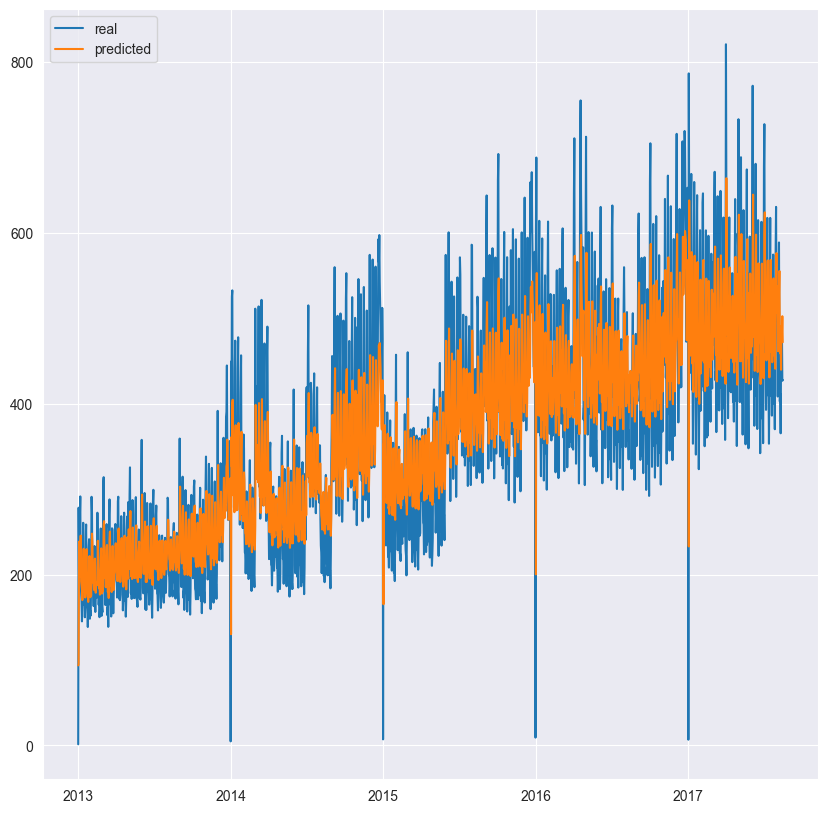

In [21]:
## what if we add the delay?
x = data 
delayed = data.shift(1)
## make na to 0
delayed = delayed.fillna(0)
x['delayed'] = delayed['sales'] ## this will be the avg sales the day before

try:
    x = x.drop(['sales','onpromotion'], axis=1)
except:
    pass

print(x)

y = data['sales']

model = LinearRegression()
model.fit(x,y)
y_pred = pd.Series(model.predict(x), index=x.index)


## plotting the results
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(y, label='real')
ax.plot(y_pred, label='predicted')
ax.legend()